# Phase 4

### Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### Reading data

In [66]:
df= pd.read_csv(r"C:\Users\HP\Downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df.head()

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [67]:
df_new = df.iloc[:,[0,1,2,-1]]
df_new.head()

,STATE,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507


In [68]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

df_new["STATE_encoded"] = lb.fit_transform(df_new["STATE"])

In [69]:
df_new.head()

,STATE,DISTRICT,YEAR,TOTAL IPC CRIMES,STATE_encoded
0,ANDHRA PRADESH,ADILABAD,2001,4154,1
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,1
2,ANDHRA PRADESH,CHITTOOR,2001,5818,1
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,1
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,1


In [70]:
x = df_new.loc[:,["TOTAL IPC CRIMES"]]
x.head()

,TOTAL IPC CRIMES
0,4154
1,4125
2,5818
3,3140
4,6507


In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [73]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
df_new["cluster"] = identified_cluster
df_new.head()

,STATE,DISTRICT,YEAR,TOTAL IPC CRIMES,STATE_encoded,cluster
0,ANDHRA PRADESH,ADILABAD,2001,4154,1,0
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,1,0
2,ANDHRA PRADESH,CHITTOOR,2001,5818,1,0
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,1,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,1,0


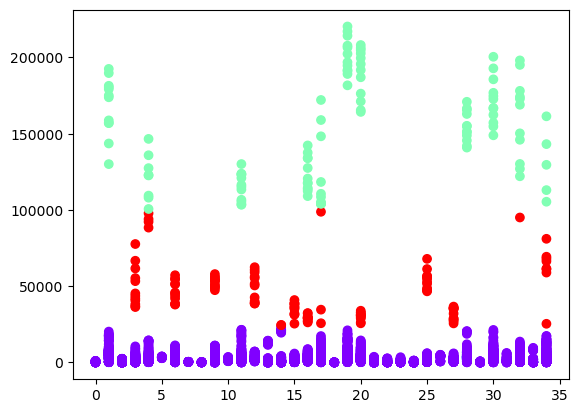

In [75]:
plt.scatter(x=df_new["STATE_encoded"],y=df_new["TOTAL IPC CRIMES"],c=df_new["cluster"],cmap="rainbow")
plt.show()

In [88]:
df_Peaceful = df_new[df_new["cluster"]==0]
df_Peaceful.head()

,STATE,DISTRICT,YEAR,TOTAL IPC CRIMES,STATE_encoded,cluster
0,ANDHRA PRADESH,ADILABAD,2001,4154,1,0
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,1,0
2,ANDHRA PRADESH,CHITTOOR,2001,5818,1,0
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,1,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,1,0


In [89]:
df_Peaceful["DISTRICT"].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'TOTAL', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [87]:
df_Moderate = df_new[df_new["cluster"]==1]
df_Moderate.head()

,STATE,DISTRICT,YEAR,TOTAL IPC CRIMES,STATE_encoded,cluster
28,ANDHRA PRADESH,TOTAL,2001,130089,1,1
169,GUJARAT,TOTAL,2001,103419,11,1
285,KARNATAKA,TOTAL,2001,109098,16,1
302,KERALA,TOTAL,2001,103847,17,1
351,MADHYA PRADESH,TOTAL,2001,181741,19,1


In [85]:
df_Sensitive = df_new[df_new["cluster"]==2]
df_Sensitive.head()

,STATE,DISTRICT,YEAR,TOTAL IPC CRIMES,STATE_encoded,cluster
70,ASSAM,TOTAL,2001,36877,3,2
115,BIHAR,TOTAL,2001,88432,4,2
135,CHHATTISGARH,TOTAL,2001,38460,6,2
190,HARYANA,TOTAL,2001,38759,12,2
253,JHARKHAND,TOTAL,2001,25447,15,2


* we have to check why Sensitive area have high crime it is beacuse of low literacy rate or any other reason
* we have to increse education and awareness to take action against crime
* we can see from above not specific district is safe and secure beacuse year on year crime is incresing even literacy is increseing
* Also to reduce crime we have to place specal force in sensitive areas